In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import seaborn as sns
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB


from sklearn.neighbors import KNeighborsClassifier

In [2]:
Total_datas = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/Total_datas.csv')
Total_labels =  pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/Total_labels.csv')
Total_datas.shape, Total_labels.shape 

((373399, 2), (373399, 1))

# Decision Tree

In [42]:
now = time.time()
X_train, X_test, y_train, y_test = train_test_split(Total_datas, Total_labels, test_size=0.3, random_state=42)
print("Training Decision Tree ...")
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
times = time.time() - now
print("Training Time : ", times," second")

Training Decision Tree ...
Training Time :  3.8182215690612793  second


In [44]:
print("Training set Accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print('Test set Accuracy : {:.3f}'.format(metrics.accuracy_score(y_test, y_pred))) 

Training set Accuracy: 1.000
Test set Accuracy : 0.634


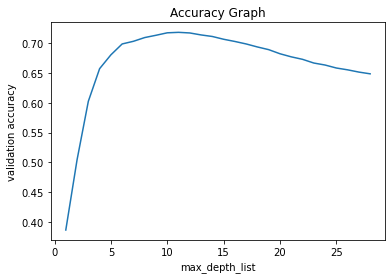

In [47]:
max_depth_list = range(1,29)
accuracies=[]

for i in max_depth_list:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    accuracies.append(tree.score(X_test,y_test))

plt.plot(max_depth_list, accuracies)
plt.xlabel("max_depth_list")
plt.ylabel("validation accuracy")
plt.title("Accuracy Graph")
plt.show()

## graphviz

# Random Forest

In [29]:
now = time.time()

X_train, X_test, y_train, y_test = train_test_split(Total_datas, Total_labels, test_size=0.3)#, random_state=42)
print("Training RandomForest ...")

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

times = time.time() - now
print("Training Time : ", times," second")

Training RandomForest ...


<ipython-input-29-ef6939f80d55>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Training Time :  31.360140323638916  second


In [41]:
y_pred = forest.predict(X_test)
print("Training set Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print('Test set Accuracy : {:.3f}'.format(metrics.accuracy_score(y_test, y_pred))) 

Training set Accuracy: 1.000
Test set Accuracy : 0.694


<ipython-input-24-95ac7589779f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
<ipython-input-24-95ac7589779f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
<ipython-input-24-95ac7589779f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
<ipython-input-24-95ac7589779f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
<ipython-input-24-95ac7589779f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

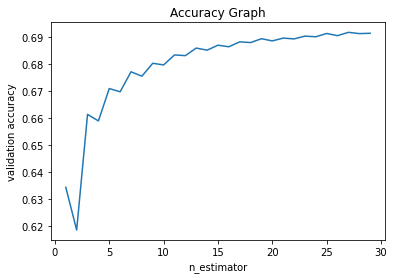

Training Time :  165.31920456886292  second


In [24]:
now = time.time()
n_estimators = range(1,30) #29개 여야만 함. accuracy 크기가 29
accuracies1=[]

for i in n_estimators:
    forest = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0)
    forest.fit(X_train,y_train)
    accuracies1.append(forest.score(X_test,y_test))

plt.plot(n_estimators, accuracies1)
plt.xlabel("n_estimator")
plt.ylabel("validation accuracy")
plt.title("Accuracy Graph")
plt.show()

times = time.time() - now
print("Training Time : ", times," second")

# Naive Bayes

In [59]:
now = time.time()
X_train, X_test, y_train, y_test = train_test_split(Total_datas, Total_labels, test_size=0.3, random_state=50)
print("Training Naive Bayes ...")
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)

times = time.time() - now
print("Training Time : ", times," second")

Training Naive Bayes ...
Training Time :  0.23776459693908691  second


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [60]:
print('Test set Accuracy : {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)*100), "%") 

Test set Accuracy : 44.496 %


# KNN

In [62]:
now = time.time()
X_train, X_test, y_train, y_test = train_test_split(Total_datas, Total_labels, test_size=0.3, random_state=50)
print("Training KNN ...")
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

times = time.time() - now
print("Training Time : ", times," second")

Training KNN ...


<ipython-input-62-0f6fb4b98387>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


Training Time :  15.608504056930542  second


<ipython-input-8-d0a265ec3b99>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-8-d0a265ec3b99>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-8-d0a265ec3b99>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-8-d0a265ec3b99>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-8-d0a265ec3b99>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

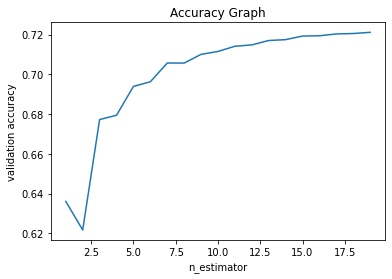

Training Time :  80.8491325378418  second


In [8]:
now = time.time()
n_neighbors = range(1,20) 
accuracies2=[]
X_train, X_test, y_train, y_test = train_test_split(Total_datas, Total_labels, test_size=0.3, random_state=50)


for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracies2.append(knn.score(X_test,y_test))
    
plt.plot(n_neighbors, accuracies2)
plt.xlabel("n_estimator")
plt.ylabel("validation accuracy")
plt.title("Accuracy Graph")
plt.show()

times = time.time() - now
print("Training Time : ", times," second")

In [63]:
print('Test set Accuracy : {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)*100), "%") 

Test set Accuracy : 67.938 %
